# Exploratory Data Analysis
Exploratory Data Analysis (EDA) is an essential step of developing a machine learning model.  This step helps us understands the quality and characteristics of the data.  Based on the information gathered, we are able to come up with a suitable solution to tackle this specific problem.

In [1]:
import pandas as pd
from pandas_summary import DataFrameSummary
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
data_dir = "_data/"
df_train = pd.read_csv(data_dir + 'train.csv')
df_train_summ = DataFrameSummary(df_train)
df_test = pd.read_csv(data_dir + 'test.csv')

In [15]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


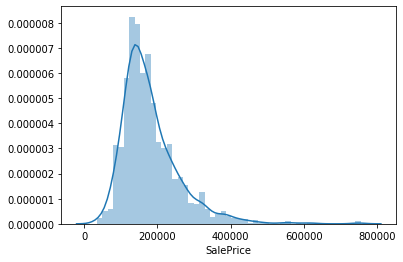

In [4]:
# Sale Price (target variable) distribution plot
sns.distplot(df_train['SalePrice']);

In [5]:
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### Correlation using Box Plot

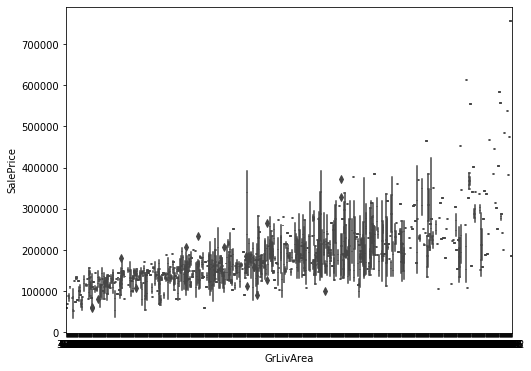

In [6]:
#  An example of using box plot to show correlation instead of scatter plot
var = 'GrLivArea'
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=df_train[['SalePrice',var]])
#fig.axis(ymin=0, ymax=800000);

In [7]:
# Show features with high correlations.  Usually highly correlated features do not improve or worsen a model, 
# If correlation is > 0.8, consider remove one of the feature in the pair to speed up the training
corr = pd.DataFrame(df_train.corr().abs().unstack())
corr = corr.reset_index()
corr.columns = ['v1', 'v2', 'c']
corr['ordered-cols'] = corr.apply(lambda x: '-'.join(sorted([x['v1'],x['v2']])),axis=1)
corr = corr.drop_duplicates(['ordered-cols'])
corr.drop(['ordered-cols'], axis=1, inplace=True)
corr = corr.query('v1 != v2').sort_values('c', ascending=False)
corr.head(10)

,v1,v2,c
1015,GarageCars,GarageArea,0.882475
253,YearBuilt,GarageYrBlt,0.825667
631,GrLivArea,TotRmsAbvGrd,0.825489
469,TotalBsmtSF,1stFlrSF,0.819530
189,OverallQual,SalePrice,0.790982
645,GrLivArea,SalePrice,0.708624
548,2ndFlrSF,GrLivArea,0.687501
821,BedroomAbvGr,TotRmsAbvGrd,0.676620
359,BsmtFinSF1,BsmtFullBath,0.649212
291,YearRemodAdd,GarageYrBlt,0.642277


### Diagonal Correlation Matrix

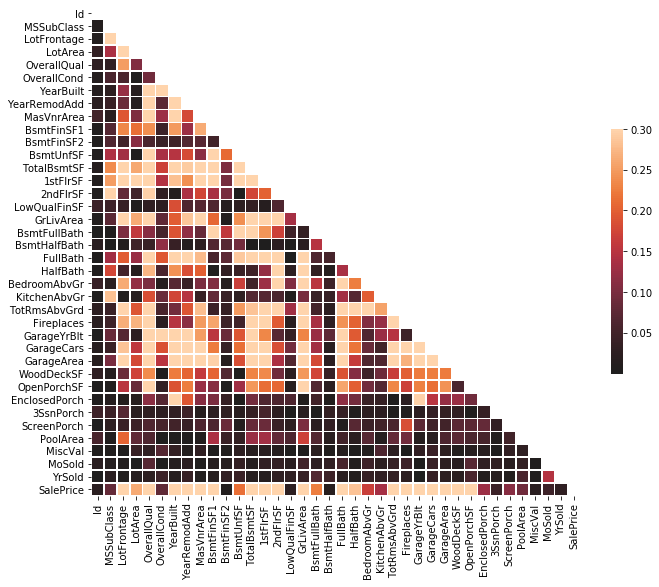

In [8]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
# Generate a mask for the upper triangle
sns_corr = df_train.corr().abs()
mask = np.zeros_like(sns_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(sns_corr, mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

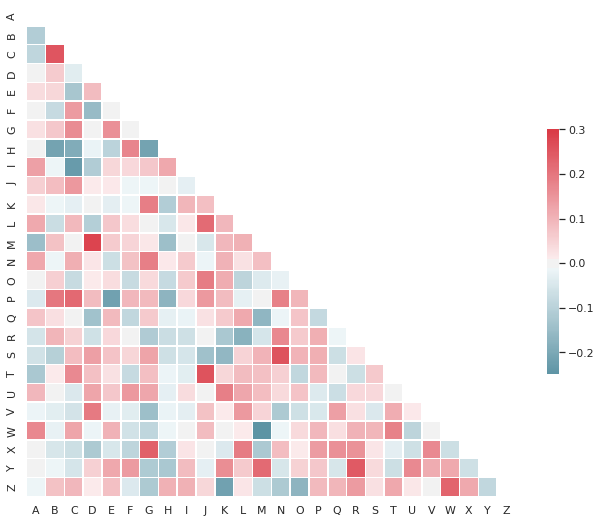

In [9]:
## Diagonal Correlation Matrix using seaborn
## Unfortunately only works with numpy <= 1.18.0 or fixed in a future release of seaborn

from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [10]:
# Variable correlations to Sale Price
sorted_corr = corr[(corr.v2 == 'SalePrice')].sort_values('c', ascending=False)
print(sorted_corr[corr.c > 0.5])

corr_cols = sorted_corr[sorted_corr.c > 0.5].v1.values
sorted_corr[['OverallQual' 'GrLivArea' 'GarageCars' 'GarageArea' 'TotalBsmtSF'
 '1stFlrSF' 'FullBath' 'TotRmsAbvGrd' 'YearBuilt' 'YearRemodAdd']].describe()

AttributeError: 'DataFrame' object has no attribute 'v2'

In [ ]:
#Grid scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

# Very strong correlation between SalePrice and OverallQual

In [ ]:
# Find missing data
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

df_train_summ.columns_stats

In [ ]:
# Show columns with missing values

col_missing_values = (df_train_summ.columns_stats[df_train_summ.columns_stats.index == 'missing_perc'].values != '0%').flatten()
df_missing = df_train_summ.columns_stats.iloc[:, col_missing_values]
df_train_summ.columns_stats.iloc[:, col_missing_values]

In [ ]:
# Describe columns with missing values

for c in df_missing.columns:
    print(df_train[c].describe())
    


In [ ]:
df_train['PoolArea'].value_counts()

#### Observations about missing values:

- PoolArea and PoolQC are pool information.  Assuming properties with missing PoolArea and PoolQC indicates the property does not have a pool, then only 7 out of 1460 properties have pools.  Consider removing the pool information since this is consider an outlier of the dataset. 
- 'MiscFeature', 'Alley', 'Fence' are other categorical variables with high percentage of missing values.  It is likely that After examining the values of each attribute, it is reasonable to assign the NA to an 'Other' category.
- 'LotFrontage' is a numerical variable with >10% of missing.  Lot frontage is a fact that each property should have but somehow is missing in this dataset, we should consider using imputation estimate the missing values.
- For other attributes with missing values, we can try 